<a href="https://colab.research.google.com/github/RubenQuispe/Machine-Learning-con-Python-001/blob/master/Lab_12_Log%C3%ADstica_Regresi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logística Regresión con Python Para Predecir el Abandono de Clientes
## Creado por [M.Sc. Ruben Quispe](https://www.linkedin.com/in/msc-rub%C3%A9n-quispe-l/)

## Curso: [Machine Learning con Python](https://eie.pe/curso-machine-learning/)
# Objetivos
Después de completar esta práctica de laboratorio, podrá:

* Utilice scikit Logistic Regression para clasificar
* Entender la matriz de confusión.

En este notebook, aprenderá Regresión logística y, luego, creará un modelo para una empresa de telecomunicaciones, para predecir cuándo sus clientes se irán a un competidor, para que puedan tomar alguna acción para retener a los clientes.

# Tabla de contenidos
1. Sobre el dataset
2. Selección y Pre-procesamiento de Data
3. Modelado (Regresión Logística con scikit learn)
4. Evaluación
5. Práctica

# ¿Cuál es la diferencia entre Regresió Lineal y Logística
Si bien la regresión lineal es adecuada para estimar valores continuos (por ejemplo, estimar el precio de la vivienda), no es la mejor herramienta para predecir la clase de un punto de datos observado. Para estimar la clase de un punto de datos, necesitamos algún tipo de orientación sobre cuál sería la clase más probable para ese punto de datos. Para ello utilizamos Regresión logística.

# Recuerde la regresión lineal:

Como sabe, la regresión lineal encuentra una función que relaciona una variable dependiente continua, y, con algunos predictores (variables independientes 𝑥1, 𝑥2, etc.). Por ejemplo, la regresión lineal simple asume una función de la forma:
$$ y= \theta_0+ \theta_1 x_1 + \theta_2 x_2 + \cdots $$
y encuentra los valores de los parámetros $ \theta_0, \theta_1, \theta_2$
 , etc., donde el término $\theta_0$ es la "intersección". Generalmente se puede mostrar como: 
$$ h_\theta(x) = \theta^TX $$
La regresión logística es una variación de la regresión lineal, útil cuando la variable dependiente observada, y, es categórica. Produce una fórmula que predice la probabilidad de la etiqueta de clase en función de las variables independientes.

La regresión logística se ajusta a una curva especial en forma de s tomando la regresión lineal y transformando la estimación numérica en una probabilidad con la siguiente función, que se llama función sigmoidea 𝜎:

$$ h_\theta(x) = \sigma({\theta^TX}) = \frac{e^{(\theta_0 + \theta_1 x_1 +\theta_2 x_2 + ...)}}{1+e^{(\theta_0 + \theta_1 x_1 +\theta_2 x_2 + \cdots)}} $$ or:
$$
ProbabilityOfaClass_1 =  P(Y=1|X) = \sigma({\theta^TX}) = \frac{e^{\theta^TX}}{1+e^{\theta^TX}} 
$$
En esta ecuación, ${\theta^TX}$ es el resultado de la regresión (la suma de las variables ponderadas por los coeficientes), exp es la función exponencial y $\sigma(\theta^TX)$ es la [función sigmoidea o logística](https://en.wikipedia.org/wiki/Logistic_function?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ), también llamada curva logística. Es una forma de "S" común (curva sigmoidea).

Entonces, brevemente, la regresión logística pasa la entrada a través del logístico / sigmoide, pero luego trata el resultado como una probabilidad:
Entonces, brevemente, la regresión logística pasa la entrada a través del logístico / sigmoide, pero luego trata el resultado como una probabilidad:

![](https://public.boxcloud.com/d/1/b1!1Ubvh33mbloPsU8cMZ9CAMd36coW_r1NH4RSIqy1PxTyzswDLgkxpY13A41JiMzhm4xZ9CZsnzozOIeIufQBDylL4Mt8xyJF7Cwb5HsFYF7CYbzCffyzLIYkt0LH82d792NgZpo3mHnV4bsVOef4z8OasulsFLJU70pvsppYeYs-Sbq8YmJejbT5i3DeFOu9PQEnYNQ93Ga_eArJwt0k2562P3JJLjQF5kItREp76piD2iOSKbejn4c_7t4rYXEEuVAt_pac8aQ1JNO93mczljonjJK98lW0hBWixfOl5yOhQYmFKUJu0_2VNQ3h_uSYbeuQRpn2L2oWJfjRGMcUX_4TaAxOXLN7YEMkBouJqdvacWe3KgkIPlPzeozJTAWiFo4WcO1C-_afUlozxUz8PWPuOe_9IRRyboTpxawgA49-p-vYv08wxA6bP3Zuhb22HoJLigpJQGdtqGy1hEYij9IDFdEpe_2IQrvaq7AVafLpZqWcikAFHx58jvG17PIjCVLxr-_V_D1x2s-qmU2Bo3SsdFQGeSFTh8HJj4HImWCXxr_x5Uf729zPxn-LWqWL4MZCV_yzipZorljiz-tfIeH-vdIWhdvQ_d7I4Zv6LYAJ4PT8IaNP3Yz2HLhxISQlLdqV-SknwyXk18RMWDqv2hDII8gZiRSC8Hn52YzFlR2PZvLyltiEr0HgFxt9V9T101y66RRsLOAMpybjZ6I9_6SFlYD0DAxsrDJoJYEF1jqsGF9w-92sRx78yIGxXUSCMN9gmQN2BAPnuoJjIrd3iEdwsFvZzKXyo8h9krnX1TkKH5mvk9VeolFXTPID8eaMyLod3FAB2O1xT77cGGJU6Mfq-A07HuueqFkIYqAMoIDgTFIPzYiYyAVnpV9WBrWHULYg8P5txEyF2AmEHrOt1vh9Lud4AeEFzxYTXGFuD9vQhJ_97L7QYLEEAgS_pvAUUbOi3aMLiVlnFDh3LY6Q5ZNER2CpcEpYYXP0t6eQC2GziqlNzrsT2Uh9C6hacv2PWqLtzot4X-O4ZOF8KeugNZzdNg66Seqz1FfwZ_hUOYwyKdTO2mqL-ulIbbhcPhKkzN5FK8Kk1ELKuo_q83WDfHkXC7qHpUFryL6a8LWkjnf2tJ8lpOTh0TSyvlxWg2lKfCuTwtt69X464AmmDxiSvzVRbn43zYOZqlxK7SrsGXBT5uNZU9rltacLGuZUuBwjY8x_e9OgsN847JL1zojnEiA32zoz35zrdGeIlaAjWHWV_1wXzHKhwezn1dpyb1gueKDPi9C8UiLlFFFG_RK0GQHgH_RlLmwYsl1Nkm4thuj2JXcr46I_AXDk08t8SMuqsbBSwseSjAz_YvPjHH6mhG3tv9_Fsku99RdSeAyrjLmVG456QgDSjMQavT_fY-fOo98QbmPqGYX7IaklMSAK_MCuZufFVFHM-qalK7ZxaQ2-_l9bqywKgpREdteMQGR09g../download)
<img
src="https://ibm.box.com/shared/static/kgv9alcghmjcv97op4d6onkyxevk23b1.png" width="400" align="center">
El objetivo del algoritmo de Regresión Logística, es encontrar los mejores parámetros θ, para ℎ𝜃 (𝑥) = 𝜎 (𝜃𝑇𝑋), de tal manera que el modelo prediga mejor la clase de cada caso.

# Rotación de clientes con regresión logística
A una empresa de telecomunicaciones le preocupa la cantidad de clientes que abandonan su negocio de telefonía fija por competidores de cable. Necesitan entender quién se va. Imagine que es analista en esta empresa y tiene que averiguar quién se va y por qué.

# 1. Primero importemos las bibliotecas necesarias:


In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

# Sobre el conjunto de datos
Usaremos un conjunto de datos de telecomunicaciones para predecir la pérdida de clientes. Este es un conjunto de datos de clientes históricos donde cada fila representa un cliente. Los datos son relativamente fáciles de entender y es posible que descubra información que puede utilizar de inmediato. Por lo general, es menos costoso mantener clientes que adquirir nuevos, por lo que el enfoque de este análisis es predecir los clientes que permanecerán en la empresa.
Este conjunto de datos proporciona información para ayudarlo a predecir qué comportamiento lo ayudará a retener clientes. Puede analizar todos los datos relevantes de los clientes y desarrollar programas de retención de clientes enfocados.

El conjunto de datos incluye información sobre:

* Clientes que se fueron en el último mes: la columna se llama Renuncia
* Servicios a los que cada cliente se ha suscrito: teléfono, varias líneas, Internet, seguridad en línea, respaldo en línea, protección de dispositivos, soporte técnico y transmisión de TV y películas.
* Información de la cuenta del cliente: cuánto tiempo ha sido cliente, contrato, método de pago, facturación electrónica, cargos mensuales y cargos totales
* Información demográfica sobre los clientes: sexo, rango de edad y si tienen socios y dependientes
# 2. Cargue los datos de Telco Churn
Telco Churn es un archivo de datos hipotéticos sobre los esfuerzos de una empresa de telecomunicaciones para reducir la rotación de su base de clientes. Cada caso corresponde a un cliente separado y registra diversa información demográfica y de uso del servicio. Antes de poder trabajar con los datos, debe usar la URL para obtener ChurnData.csv.



In [3]:
churn_df = pd.read_csv("D:/TECHNOLOGY 2020/Data/ChurnData.csv")
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [3]:
churn_df.shape

(200, 28)

# 3. Data Preprocesamiento y selección 
Seleccionemos algunas características para el modelado. También cambiamos el tipo de datos de destino para que sea entero, ya que es un requisito del algoritmo skitlearn:

In [4]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


# Práctica
¿Cuántas filas y columnas hay en este conjunto de datos en total? ¿Cómo se llaman las columnas?

In [5]:
# write your code here
churn_df.shape

(200, 10)

Definamos X e y para nuestro conjunto de datos:

In [6]:
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [7]:
y = np.asarray(churn_df['churn'])
y [0:5]

array([1, 1, 0, 0, 0])

Además, normalizamos el conjunto de datos:

In [8]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

# 4. Train /Test dataset
Bien, dividimos nuestro conjunto de datos en tren y conjunto de prueba:

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


# 5. Modelado Regresión Logística con scikit-learn

Construyamos nuestro modelo usando LogisticRegression del paquete Scikit-learn. Esta función implementa la regresión logística y puede usar diferentes optimizadores numéricos para encontrar parámetros, incluidos los solucionadores "newton-cg", "lbfgs", "liblinear", "sag" y "saga". Puede encontrar amplia información sobre los pros y los contras de estos optimizadores si lo busca en Internet.

La versión de Regresión logística en Scikit-learn, admite regularización. La regularización es una técnica utilizada para resolver el problema de sobreajuste en modelos de aprendizaje automático. El parámetro C indica el inverso de la fuerza de regularización, que debe ser un valor flotante positivo. Los valores más pequeños especifican una regularización más fuerte. Ahora ajustemos nuestro modelo con juego de trenes:

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

Ahora podemos predecir usando nuestro conjunto de prueba:

In [11]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

predict_prob devuelve estimaciones para todas las clases, ordenadas por la etiqueta de clases. Entonces, la primera columna es la probabilidad de la clase 1, P (Y = 1 | X), y la segunda columna es la probabilidad de la clase 0, P (Y = 0 | X):

In [14]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.54132919, 0.45867081],
       [0.60593357, 0.39406643],
       [0.56277713, 0.43722287],
       [0.63432489, 0.36567511],
       [0.56431839, 0.43568161],
       [0.55386646, 0.44613354],
       [0.52237207, 0.47762793],
       [0.60514349, 0.39485651],
       [0.41069572, 0.58930428],
       [0.6333873 , 0.3666127 ],
       [0.58068791, 0.41931209],
       [0.62768628, 0.37231372],
       [0.47559883, 0.52440117],
       [0.4267593 , 0.5732407 ],
       [0.66172417, 0.33827583],
       [0.55092315, 0.44907685],
       [0.51749946, 0.48250054],
       [0.485743  , 0.514257  ],
       [0.49011451, 0.50988549],
       [0.52423349, 0.47576651],
       [0.61619519, 0.38380481],
       [0.52696302, 0.47303698],
       [0.63957168, 0.36042832],
       [0.52205164, 0.47794836],
       [0.50572852, 0.49427148],
       [0.70706202, 0.29293798],
       [0.55266286, 0.44733714],
       [0.52271594, 0.47728406],
       [0.51638863, 0.48361137],
       [0.71331391, 0.28668609],
       [0.

# 6. Evaluación 

# Indice de Jaccard
Probemos el índice jaccard para evaluar la precisión. podemos definir jaccard como el tamaño de la intersección dividido por el tamaño de la unión de dos conjuntos de etiquetas. Si todo el conjunto de etiquetas predichas para una muestra coincide estrictamente con el conjunto verdadero de etiquetas, entonces la precisión del subconjunto es 1.0; de lo contrario, es 0.0.

In [24]:
#colab
#from sklearn.metrics import jaccard_similarity_score
#jaccard_similarity_score(y_test, yhat)
#local
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

0.375

# 7. matriz de confusión 
Otra forma de ver la precisión del clasificador es mirar la matriz de confusión.

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 6  9]
 [ 1 24]]


Confusion matrix, without normalization
[[ 6  9]
 [ 1 24]]


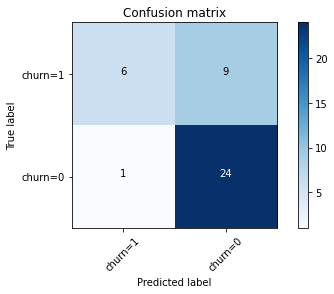

In [27]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

Mira la primera fila. La primera fila es para los clientes cuyo valor de abandono real en el conjunto de prueba es 1. Como puede calcular, de 40 clientes, el valor de abandono de 15 de ellos es 1. Y de estos 15, el clasificador predijo correctamente 6 de ellos como 1 y 9 de ellos como 0.

Significa que, para 6 clientes, el valor de abandono real fue 1 en el conjunto de prueba, y el clasificador también predijo correctamente esos como 1. Sin embargo, mientras que la etiqueta real de 9 clientes fue 1, el clasificador predijo esos como 0, lo que no es muy bueno . Podemos considerarlo como un error del modelo de la primera fila.

¿Qué pasa con los clientes con valor de deserción 0? Veamos la segunda fila. Parece que hubo 25 clientes cuyo valor de abandono fue 0.

El clasificador predijo correctamente 24 de ellos como 0 y uno de ellos incorrectamente como 1. Por lo tanto, ha hecho un buen trabajo al predecir los clientes con un valor de rotación 0. Lo bueno de la matriz de confusión es que muestra la capacidad del modelo para predecir correctamente o separar las clases. En un caso específico de clasificador binario, como este ejemplo, podemos interpretar estos números como el recuento de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos.

In [28]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



Basándonos en el recuento de cada sección, podemos calcular la precisión y la recuperación de cada etiqueta:

* **PRECISION** es una medida de la precisión siempre que se haya predicho una etiqueta de clase. Está definido por: precisión = TP / (TP + FP)

* **RECALL** es una verdadera tasa positiva. Se define como: Recuperación = TP / (TP + FN)

Entonces, podemos calcular la precisión y la recuperación de cada clase.

**F1 score**: ahora estamos en condiciones de calcular los puntajes F1 para cada etiqueta en función de la precisión y el recuerdo de esa etiqueta.

La puntuación F1 es el promedio armónico de la precisión y la recuperación, donde una puntuación F1 alcanza su mejor valor en 1 (precisión y recuperación perfecta) y el peor en 0. Es una buena forma de demostrar que un clasificador tiene un buen valor para ambos recuerdo y precisión.

Y finalmente, podemos decir que la precisión promedio para este clasificador es el promedio de la puntuación F1 para ambas etiquetas, que es 0,72 en nuestro caso.

# Log loss
Ahora, intentemos la pérdida de registros para su evaluación. En la regresión logística, el resultado puede ser que la probabilidad de que el cliente abandone sea sí (o igual a 1). Esta probabilidad es un valor entre 0 y 1. La pérdida logarítmica (pérdida logarítmica) mide el rendimiento de un clasificador donde la salida prevista es un valor de probabilidad entre 0 y 1.

In [30]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6017092478101187

# Práctica
Intente volver a crear el modelo de regresión logística para el mismo conjunto de datos, pero esta vez, ¿usará diferentes valores de __solver__ y __regularization__? ¿Cuál es el nuevo valor de __logLoss__?

In [32]:
# Escribi tu codigo
LR2 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
yhat_prob2 = LR2.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))

LogLoss: : 0.61


# Gracias por su atención